<a href="https://colab.research.google.com/github/sillHD/CuadernosSyS/blob/main/Parcial1_SyS_2024_2_Ismael_Cortes_Ramirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.

 ## Estudiante: Ismael Cortes Ramirez

 ## Fecha 05/12/2024

## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales

# Instrucciones

-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

# Solucion Pregunta 1

Antes de empezar a escribir el codigo debemos confirmar si la frecuencia de muestreo que se nos brinda es la apropiada para el sistema, para esto realizamos los siguientes calculos
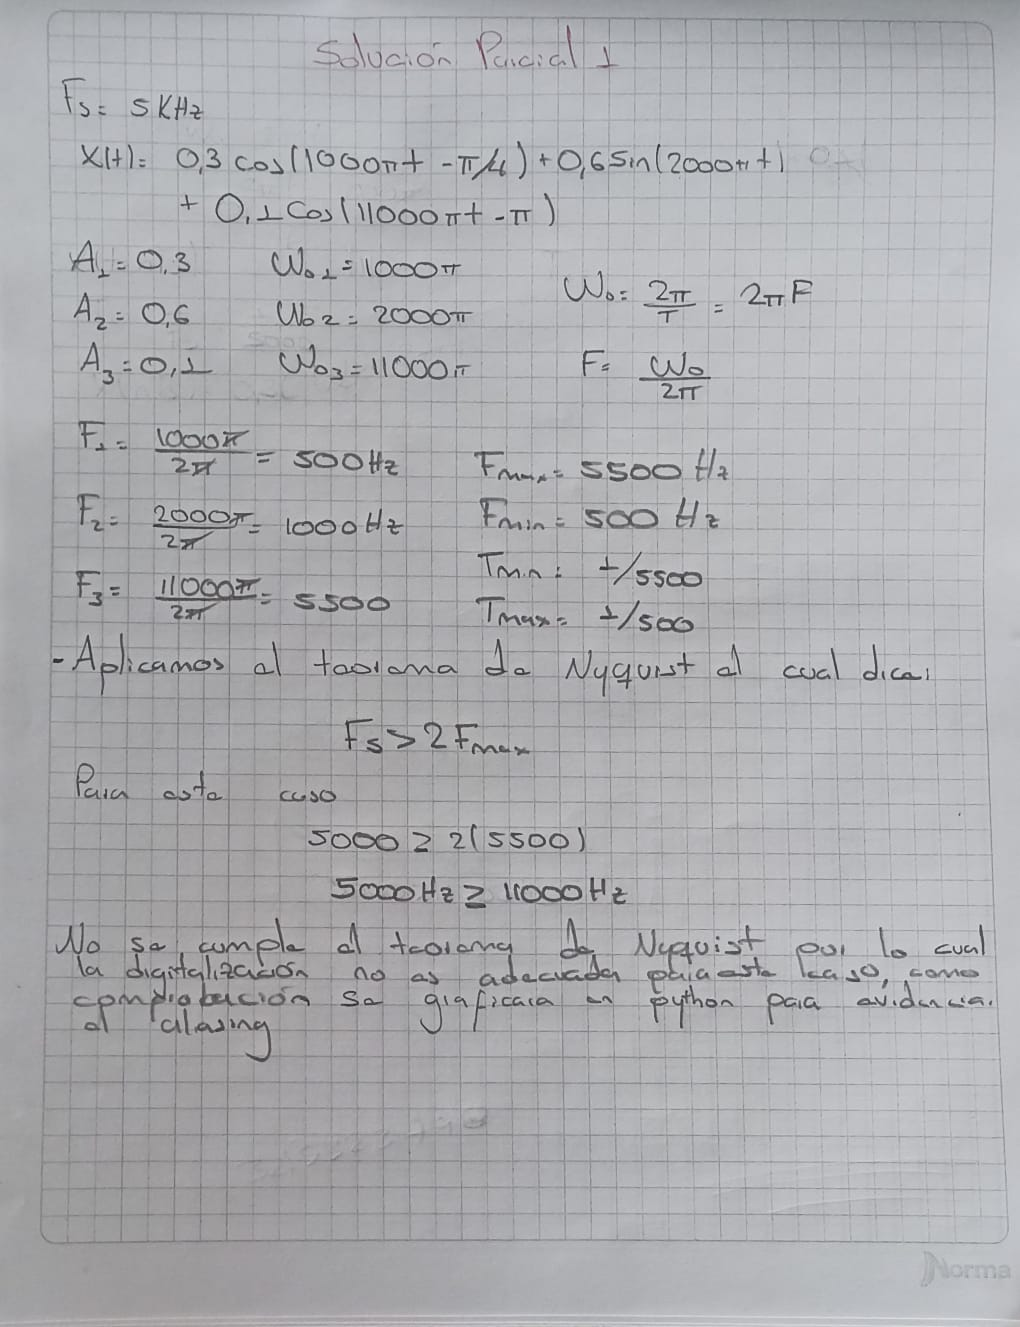

reemplazando obtenemos que la forma de la funcion discreta es la siguiente
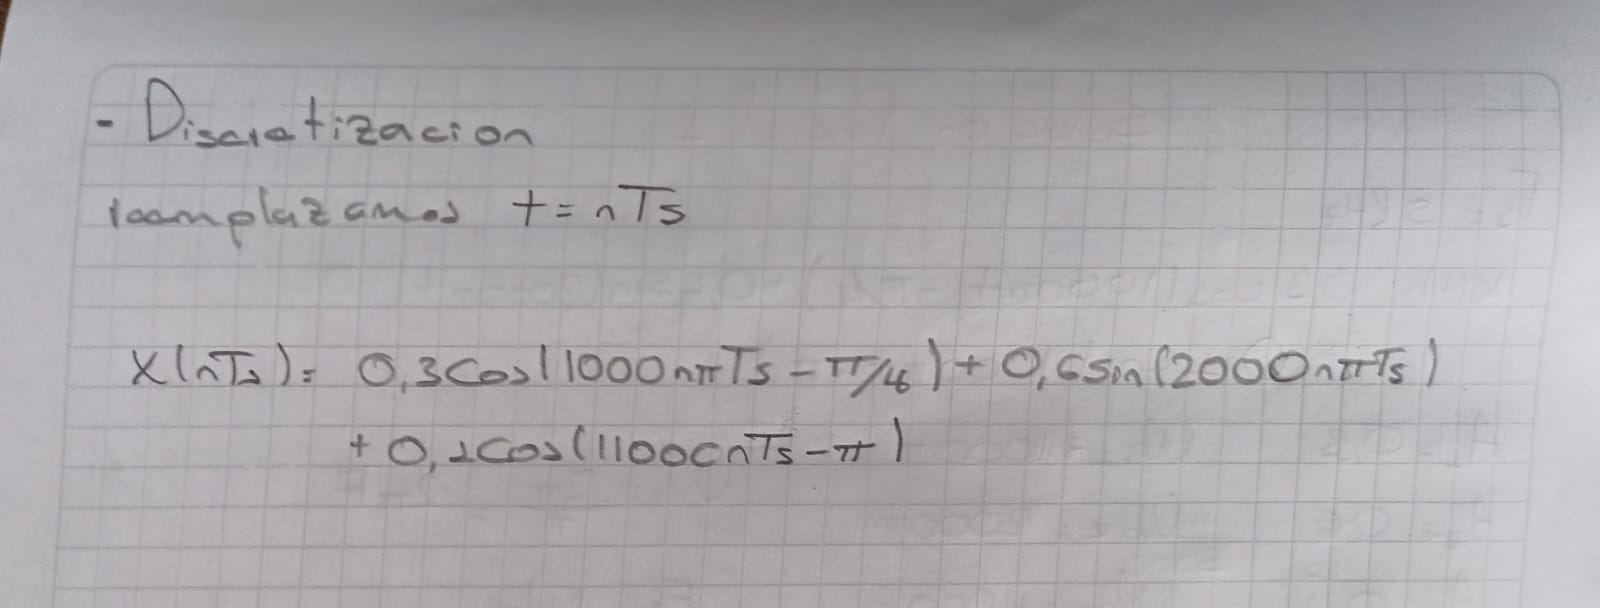

al realizar los calculos podemos notar que la frecuencia de muestreo no es la apropiada ya que con cumple el teorema de nyquist, sin embargo procederemos con los calculos y graficacion con esta frecuencia para al final observar como son los resultados en este tipo de casos.

## Conversor Analogo Original

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  cero y pendiente
def my_ceropen(x,ymin, ymax): # usamos el ceroy pendiente para redefinir el rango que tomaran las graficas, ya sea ampliarlas o achicarlas, en este caso las adaptamos a los valores de el voltaje
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

# Frecuencia, periodo de muestreo
Fs = 5000
Ts = 1/Fs
Vmin = -3.3 # estos son los limites inferior y superior en el eje horizontal de los estados y de las graficas, definen que rango abarcan
Vmax  = 3.3

# Se crea un vector con los valores de las amplitudes
A = [0.3,0.6,0.1]

# Se crea un vector con los valores de la velociades angulares
Wo = [1000*np.pi,2000*np.pi,11000*np.pi]

# Se crea un vector para las fases
phi = [-np.pi/4,0,-np.pi]

# se crea un vector vacio el cual almacenara las frecuencias de cada seccion de la funcion, despues se usa un ciclo que  utiliza el vector Wo para calcular las frecuencias
F =[]
for i in range(len(Wo)):
  F.append(Wo[i]/(2*np.pi))

# se crea un vector para definir los valores de t, debemos tener en cuenta que se nos pidio graficar al menos 3 ciclos, por lo cual necesitaremos la parte de la funcion que tiene la frencuencia menor para asi calcular el periodo maximo de la funcion
T_max  = 1/F[0]

# se multplica por 3 el periodo maximo para  asi cumplir los 3 ciclos
t = np.linspace(0,3*T_max,Fs)

# Se crea una variable que sera la funcion que se nos dio del ejercicio, para poder llenarla se usa un ciclo que va usando los vectores A, Wo y phi para armar cada seccion de la funcion y agregarla a x
x = 0
for i in range(len(A)):
  if i%2 == 0:
    x += (A[i]*np.cos(Wo[i]*t + phi[i]))
  else:
    x += (A[i]*np.sin(Wo[i]*t + phi[i]))

# Proceso de discretizacion
tv = np.arange(0,3*T_max,Ts) # en esta seccion de codigo se obtienen las muestras de la discretizacion
nbits  = 5 # establecemos el  numero de bits que se nos dio para los estados
xv = 0

ve  = np.linspace(Vmin,Vmax,2**nbits) # definimos los limites para los estados usando los voltajes dados

for i in range(len(A)):
  if i%2 == 0:
    xv += (A[i]*np.cos(Wo[i]*tv + phi[i]))
  else:
    xv += (A[i]*np.sin(Wo[i]*tv + phi[i]))

# aplicamos el cero y pendiente para los voltajes dados
x = my_ceropen(x,Vmin,Vmax) # se aplica la funcion de cero y pendiente
xv = my_ceropen(xv,Vmin,Vmax) # se aplica la funcion de cero y pendiente


# esta seccion grafica la funcion continua
plt.figure(figsize=(12, 9)) # hace que la grafica sea mas ancha
plt.subplot(3, 1, 1) #  definimos la matriz para las graficas, que seccion van a ocupar cada  una
plt.plot(t,x, label="Señal continua", color='red')
plt.title("Señal Continua")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje")
plt.grid()
plt.legend()
plt.ylim(Vmin-0.2,Vmax+0.2)
plt.xlim(-0.00005, 3*T_max+0.0001) # Ajusta el límite inferior del eje x un poco mas abajo de 0

# esta seccion grafica la señal discreta
plt.subplot(3, 1, 2)
plt.plot(tv,xv, color='blue', label="Señal discreta")
plt.title("Señal Discreta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje")
plt.grid()
plt.legend()
plt.ylim(Vmin-0.2,Vmax+0.2)
plt.xlim(-0.00005, 3*T_max+0.0001) # Ajusta el límite inferior del eje x un poco mas abajo de 0

# Esta seccion grafica la señal digital
plt.subplot(3, 1, 3)
for v in ve:
  plt.plot(tv,v*np.ones(len(tv))) # grafica los 32 estados que se obtuvieron de los 5 bits
plt.plot(tv,xv, color='green')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5) # traza una linea para notar mejor el eje 0
plt.stem(tv, xv, linefmt='g-', markerfmt='go', basefmt=' ', label="Señal Digital") # genera  un grafico de tallo con lineas verticales
plt.title("Señal Digital")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje")
plt.grid()
plt.legend()
plt.ylim(Vmin-0.2,Vmax+0.2)
plt.xlim(-0.00005, 3*T_max) # Ajusta el límite inferior del eje x a 0


plt.tight_layout()
plt.show()

si comparamos las dos graficas podemos notar que se presenta un aliasing en la grafica discreta debido a que la frecuencia de muestreo no cumple el teorema de nyquist,  por lo cual procederemos implementar un conversor adecuado para la señal estudiada, para esto usaremos como base el codigo anterior, con el ligero cambio de que estableceremos la frecuencia de muestreo y el numero de bits como variables de entrada

## Conversor Analogo Modificado

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  cero y pendiente
def my_ceropen(x,ymin, ymax): # usamos el ceroy pendiente para redefinir el rango que tomaran las graficas, ya sea ampliarlas o achicarlas, en este caso las adaptamos a los valores de el voltaje
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

# Se crea un vector con los valores de las amplitudes
A = [0.3,0.6,0.1]

# Se crea un vector con los valores de la velociades angulares
Wo = [1000*np.pi,2000*np.pi,11000*np.pi]

# Se crea un vector para las fases
phi = [-np.pi/4,0,-np.pi]

# se crea un vector vacio el cual almacenara las frecuencias de cada seccion de la funcion, despues se usa un ciclo que  utiliza el vector Wo para calcular las frecuencias
F =[]
for i in range(len(Wo)):
  F.append(Wo[i]/(2*np.pi))
F_max =  max(F)

# Variables de entrada
Fs = int(input("Ingrese la frecuencia de muestreo(Hz):\n ")) # pedimos que valor de la frecuencia de muestreo se quiere para la grafica
while Fs < 2*F_max:  # se hace una validacion en la que evalua si la frecuencia de muestreo cumple  el teorema de nyquist, si no lo cumple vuelve a pedir el valor hasta que lo cumpla
  Fs = int(input(f"La frecuencia ingresada no cumple con el teorema de Nyquist, recuerde que para este caso la frecuencia de muestreo(Fs) debe ser mayor o igual a {2*round(F_max)}Hz\n" ))
Ts = 1/Fs
nbits  = int(input("Ingrese el numero de bits:\n ")) # pedimos el numero de bits que queremos para la cuantizacion
# se crea un vector para definir los valores de t, debemos tener en cuenta que se nos pidio graficar al menos 3 ciclos, por lo cual necesitaremos la parte de la funcion que tiene la frencuencia menor para asi calcular el periodo maximo de la funcion
T_max  = 1/min(F)
t = np.linspace(0,3*T_max,5000)

# Se crea una variable que sera la funcion que se nos dio del ejercicio, para poder llenarla se usa un ciclo que va usando los vectores A y Wo para armar cada seccion de la funcion y agregarla a x
x = 0
for i in range(len(A)):
  if i%2 == 0:
    x += (A[i]*np.cos(Wo[i]*t + phi[i]))
  else:
    x += (A[i]*np.sin(Wo[i]*t + phi[i]))

# Proceso de discretizacion
tv = np.arange(0,3*T_max,Ts)
xv = 0

ve  = np.linspace(Vmin,Vmax,2**nbits) # definimos los limites para los estados usando los voltajes dados

for i in range(len(A)):
  if i%2 == 0:
    xv += (A[i]*np.cos(Wo[i]*tv + phi[i]))
  else:
    xv += (A[i]*np.sin(Wo[i]*tv + phi[i]))

# aplicamos el cero y pendiente para los voltajes dados
x = my_ceropen(x,Vmin,Vmax) # se aplica la funcion de cero y pendiente
xv = my_ceropen(xv,Vmin,Vmax) # se aplica la funcion de cero y pendiente

# esta seccion grafica la funcion continua
plt.figure(figsize=(12, 9)) # hace que la grafica sea mas ancha
plt.subplot(3, 1, 1)
plt.plot(t,x, label="Señal continua", color='red')
plt.title("Señal Continua")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.ylim(Vmin-0.2,Vmax+0.2)
plt.xlim(-0.00005, 3*T_max+0.0001) # Ajusta el límite inferior del eje x un poco mas abajo de 0

# esta seccion grafica la señal discreta
plt.subplot(3, 1, 2)
plt.plot(tv,xv, color='blue', label="Señal discreta")
plt.title("Señal Discreta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.ylim(Vmin-0.2,Vmax+0.2)
plt.xlim(-0.00005, 3*T_max+0.0001) # Ajusta el límite inferior del eje x un poco mas abajo de 0

# Esta seccion grafica la señal digital
plt.subplot(3, 1, 3)
for v in ve:
  plt.plot(tv,v*np.ones(len(tv))) # grafica los 32 estados que se obtuvieron de los 5 bits
plt.plot(tv,xv, color='green')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5) # traza una linea para notar mejor el eje 0
plt.stem(tv, xv, linefmt='g-', markerfmt='go', basefmt=' ', label="Señal Digital") # genera  un grafico de tallo con lineas verticales
plt.title("Señal Digital")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.ylim(Vmin-0.2,Vmax+0.2)
plt.xlim(-0.00005, 3*T_max) # Ajusta el límite inferior del eje x un poco mas abajo de 0


plt.tight_layout()
plt.show()

Ahora con el codigo estableciendo parametros para que se cumpla lo requerido para una frecuencia de muestreo adecuada podemos obtener una  grafica que no presente un aliasing tan notable como se obtiene con el codigo que  maneja la frecuencia de muestreo original.

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

# Solucion Pregunta 2

Para confirmar que el sistema es lineal debemos primero comprobar que este cumpla los criterios de homogeneidad y aditividad, en el primer caso comprobaremos el criterio de homogeneidad.
## Homogeneidad
este nos indica lo siguiente:Si la entrada $\ x(t) $ produce la salida $\ y(t) $, entonces, para un sistema lineal:


$x(t) \to y(t) \implies k \cdot x(t) \to k \cdot y(t)$

en palabras simples este nos dice que la señal de salida que se obtiene del slit de la señal de entrada $k \cdot x(t)$ es igual a la señal de salida multiplicada por el escalar $k \cdot y(t)$.

donde \( k \) es un escalar.

In [ ]:
# linealidad homogeneidad
alpha = 2 # definimos el valor de nuestro escalar
x1 = alpha*np.heaviside(t,1) # multiplicamos nuestra primera señal de entrada por el escalar
y1 = my_system.predict(x1) # pasamos nuestra señal por el slit
x2 = np.heaviside(t,1) # creamos nuestra segunda señal de entrada sin multiplicarla por el escalar
y2 = alpha*my_system.predict(x2) # aplicamos el slit y luego la multiplicamos por el escalar
fig, axs = plt.subplots(2,1)
axs[0].stem(t, y1, label='Señal de salida $y_1$') # graficamos la primera señal de salida con pulsos
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y2, label='Señal salida $y_2$') # graficamos la segunda señal de salida
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

como podemos confirmar nuestras dos señales de prueba generan la misma grafica por lo cual concluimos que el sistema cumple el criterio de homogeneidad, Ahora seguimos con el criterio de aditividad

## Aditividad

Si las entradas $ x_1(t)$  y  $x_2(t) $ producen las salidas $ y_1(t)$  y  $y_2(t) $, respectivamente, entonces:


$x_1(t) \to y_1(t) \quad \text{y} \quad x_2(t) \to y_2(t) \implies x_1(t) + x_2(t) \to y_1(t) + y_2(t).$


In [ ]:
# linealidad aditividad
x_sub1 = np.heaviside(t,1) # tomamos nuestra primera señal de entrada que se da en el codigo base
x_sub2 = np.exp(2*t) # ahora tomamos otra señal cualquiera  que actue como  la señal de entrada x2(t)
y_sub1 = my_system.predict(x_sub1 + x_sub2) # a la suma de las dos señales le aplicamos el slit para obtener nuestra primera señal de salida
y_sub2 = my_system.predict(x_sub1) + my_system.predict(x_sub2) # para nuestra otra señal de salida debemos aplicar el slit a cada una de nuestras señales de entrada y despues sumarlas

# Graficar y comparar
fig, axs = plt.subplots(2,1)
axs[0].stem(t,y_sub1, label='Señal de salida $y_1$') # graficamos nuestra primera señal de salida
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_sub2, label='Señal salida $y_2$')  #graficamos nuestra segunda señal de salida
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()


al tener nuestras dos señales de salida podemos comparlas y notar que tambien se cumple el  criterio de aditividad por lo cual podemos concluir que el sistema es lineal, otra propiedad que se pudo aplicar es la de superposicion ya que este combina las dos propiedades anteriores en una solar por lo cual se podia comprobar todo con un solo bloque de codigo sin embargo no se aplico para este caso, ahora debemos confirmar si el sistema es invariente en el tiempo

## Invariante en el tiempo
Si la entrada $x(t)$ produce la salida $y(t)$, entonces, para un sistema invariante en el tiempo:


$x(t) \to y(t) \implies x(t - t_0) \to y(t - t_0)$,


donde \$t_0$ es el desplazamiento temporal.

en palabras simples esto nos dice que si se le aplica un desplazamiento temporal a la funcion de entrada para cualquier  $t?0$ la funcion de salida no debe cambiar su forma, para confirmar esto tomaremos 3 valores para $t_0$ y luego compararemos sus señales de salida, si estas conservan la misma tendencia entonces podremos concluir que el sistema es invariante

In [ ]:
# Invariancia en el tiempo
t_desfase = [-0.001,0,0.001] # este es vector que contendra los valores t_o
control = 1
for to in t_desfase: # este ciclo recorre el vector del desfase y aplica cada valor a la señal de entrada y luego la grafica y continua con el siguiente elemento del vector
  x3 = np.heaviside(t-to,1) # aplica el desfase a la funcion
  y3 = my_system.predict(x1)  # se aplica el slit para obtener la señal de salida
  fig, axs = plt.subplots(2,1)

  # Graficar y comparar
  axs[0].stem(t, x3, label=f'Señal de entrada $x_{control}$')
  axs[0].set_title(f"Desfase de {to}")
  axs[0].set_xlabel('Tiempo (s)')
  axs[0].set_ylabel('Amplitud')
  axs[0].legend()
  axs[0].grid()
  axs[1].stem(t,y3, label=f'Señal salida $y_{control}$')
  axs[1].set_xlabel('Tiempo (s)')
  axs[1].set_ylabel('Amplitud')
  axs[1].legend()
  axs[1].grid()
  plt.tight_layout()
  plt.show()
  print()
  control  += 1


despues de correr el codigo podemos observar que el codigo no cambia la forma de la grafica de salida independientemente de  el  desfase que se aplique por lo cual podemos concluir que la señal es invariante en el tiempo, ahora procederemos a calcular la respuesta impulso  para asi usarla para hallar la señal de salida.

## Respuesta al impulso

La respuesta al impulso es la reaccion que tiene el sistema a un impulso unitario o delta de dirac $δ(t)$, para poder calcular la respuesta impulso tomaremos nuestra señal delta y la pasaremos por el slit del sistema y  compararemos su señal unitaria con la respuesta.

In [ ]:

# Señal de entrada y sus valores
Wo_n = [100*np.pi,600*np.pi] # armamos un vector con la velocidades angulares
Ts_n = 1/2*min(Wo_n)/(2*np.pi) # calculamos el periodo de muestreo usando el teorema de nyquist y lo ingresamos como nuestro intevalo de muestras
t_n = np.arange(0,20, 1/Ts_n) # armamos un vector para nuestro t_n el cual tendra valores que los definira el periodo de muestreo
x_n = 0 # creamos una funcion vacia para nuestra funcion de entrada
for i in Wo_n: # llenamos nuestra  funcion con los valores del vector Wo_n
  x_n += np.sin(i*t_n)

# Crear el impulso unitario (d[n])
N = 20  # Duración de la señal(numero de elementos que tendra nuestro pulso)
delta = np.zeros(N) # creamos un vector para nuestro  pulso que constara de 20 ceros
delta[10] = 1  #  luego asignamos un valor de 1 a una sola posicion de nuestro vector de ceros, asi creamos el pulso

# Obtener la respuesta al impulso
h_n = my_system.predict(delta) # pasamos el pulso por el slit para obtener nuestra respuesta al impulso

# Gráfica
plt.stem(range(len(h)), delta, basefmt="r")
plt.title("Impulso unitario $d[n]$")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()
plt.show()
print()
plt.stem(range(len(h)), h, basefmt="r")
plt.title("Respuesta al Impulso del Sistema $h[n]$")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()
plt.ylim([0,0.27])
plt.show()
print()


Ahora que tenemos nuestra respuesta al impulso podemos proceder a aplicar la convolucion entre la señal de entrada y la respuesta al impulso para asi obtener nuestra señal de salida

## Convolucion

La salida $y(t)$ de un sistema LTI se obtiene mediante la convolución de $x(t)$ y $h(t)$:


$y(t) =x(t) * h(t)$

para este caso usaremos la funcion "convolve" de la libreria numpy la cual nos permite convolucionar $x(t)$ y $h(t)$.


In [ ]:
# convolucion
y_con = np.convolve(x_n,h_n) # aplicamos la funcion de la libreria numpy para obtener la señal de salida

plt.plot(range(len(y_con)), y_con, label='Salida $y[n]$', color='r') # graficamos la señal teniendo en cuenta el numero de elementos de el vector y_con
plt.title("Salida por convolucion $y[n]$")
plt.xlabel("n (muestras)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
print()

ahora procederemos a comparar esta señal de salida con la que es obtenida si aplicamos el slit a la señal de entrada, si ambos calculos se efectuaron de  manera adecuada se supone que las dos graficas de las señales  de salida deben ser identicas.

## SLIT

la formula de la señal de salida por medio del slit es la siguiente

$y(t) =H[x(t)]$


In [ ]:
# slit
y_slit = my_system.predict(x_n) # aplicamos el slit del sistema dado

plt.plot(range(len(y_slit)), y_slit, label='Salida $y[n]$', color='r')
plt.title("Salida por el slit $y[n]$")
plt.xlabel("n (muestras)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
print()

Podemos notar que ambas señales son identicar por lo cual concluimos que la funcion de salida de la señal $x(n)$ es correcta